In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [6]:
XXX = pd.read_csv('DimPatientCoded.csv')
XXX.head()

,Unnamed: 0,Date Announced,Age Bracket,Age,Gender,Detected State,PovertyRate,Current Status,Type of trans,Nationality,Symptoms,JobLoss,FinancialSituation,Diseases,Profession,CovidAfterVaccin,Vaccinated,Reason
0,0,1/30/2020,0,1.0,0,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0
1,1,2/2/2020,0,1.0,1,16,7.05,1,1,India,5,0,0,4,2,1,1,0.0
2,2,2/3/2020,0,1.0,1,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0
3,3,3/2/2020,0,1.0,1,8,9.91,1,1,India,2,2,0,2,1,0,0,2.0
4,4,3/2/2020,0,1.0,1,31,13.74,1,1,India,2,0,1,4,2,0,0,4.0


In [18]:
XX =  XXX[['Age Bracket','Current Status','Gender','Detected State','PovertyRate','Diseases','Profession']]
dataset = XX.replace(np.nan,0)
dataset
print(XX.shape)


(247236, 8)


In [19]:
print(XX.columns)

Index(['Age Bracket', 'Current Status', 'Gender', 'Detected State',
       'PovertyRate', 'Diseases', 'Profession', 'Vaccinated'],
      dtype='object')


In [15]:
print(XX.describe())

         Age Bracket  Current Status         Gender  Detected State  \
count  247236.000000   247236.000000  247236.000000   247236.000000   
mean        2.291503        0.378565       0.844659       18.156183   
std         1.023251        0.581446       0.362432        8.647260   
min         0.000000        0.000000       0.000000        0.000000   
25%         2.000000        0.000000       1.000000       15.000000   
50%         2.000000        0.000000       1.000000       15.000000   
75%         2.000000        1.000000       1.000000       27.000000   
max         5.000000        3.000000       2.000000       35.000000   

         PovertyRate       Diseases     Profession     Vaccinated  
count  247236.000000  247236.000000  247236.000000  247236.000000  
mean       20.196047       2.669967       1.735342       0.607933  
std         7.473078       1.307894       1.522308       0.488212  
min         1.000000       0.000000       0.000000       0.000000  
25%        15.710000

array([[<AxesSubplot:xlabel='Age Bracket', ylabel='Age Bracket'>,
        <AxesSubplot:xlabel='Current Status', ylabel='Age Bracket'>,
        <AxesSubplot:xlabel='Gender', ylabel='Age Bracket'>,
        <AxesSubplot:xlabel='Detected State', ylabel='Age Bracket'>,
        <AxesSubplot:xlabel='PovertyRate', ylabel='Age Bracket'>,
        <AxesSubplot:xlabel='Diseases', ylabel='Age Bracket'>,
        <AxesSubplot:xlabel='Profession', ylabel='Age Bracket'>,
        <AxesSubplot:xlabel='Vaccinated', ylabel='Age Bracket'>],
       [<AxesSubplot:xlabel='Age Bracket', ylabel='Current Status'>,
        <AxesSubplot:xlabel='Current Status', ylabel='Current Status'>,
        <AxesSubplot:xlabel='Gender', ylabel='Current Status'>,
        <AxesSubplot:xlabel='Detected State', ylabel='Current Status'>,
        <AxesSubplot:xlabel='PovertyRate', ylabel='Current Status'>,
        <AxesSubplot:xlabel='Diseases', ylabel='Current Status'>,
        <AxesSubplot:xlabel='Profession', ylabel='Current Statu

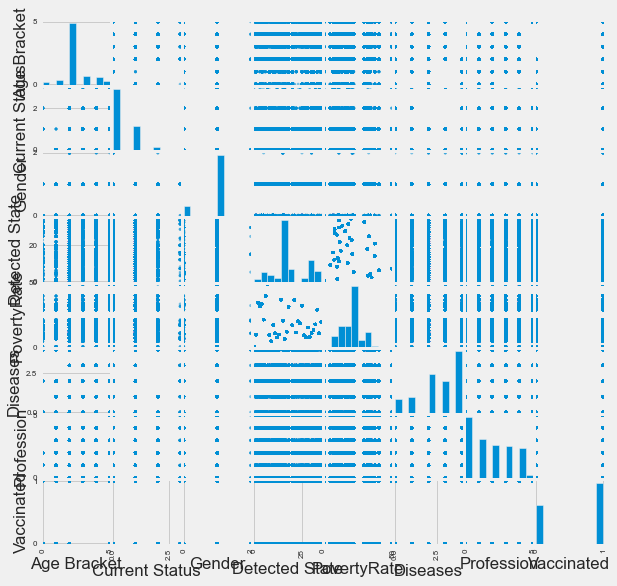

In [17]:
#graphique - croisement deux à deux des variables
from pandas.plotting import scatter_matrix 
scatter_matrix(XX,figsize=(9,9))

In [23]:
X =  XXX[['Age Bracket','Current Status','Gender','Diseases','Profession','Reason']]
dataset = X.replace(np.nan,0)
dataset
print(X.shape)

(247236, 6)


In [25]:
print(X.columns)

Index(['Age Bracket', 'Current Status', 'Gender', 'Diseases', 'Profession',
       'Reason'],
      dtype='object')


In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=6)
new=X.iloc[:,[0,1,2,3,4,5,]]
print(new)

        Age Bracket  Current Status  Gender  Diseases  Profession  Reason
0                 0               1       0         4           1     0.0
1                 0               1       1         4           2     0.0
2                 0               1       1         4           1     0.0
3                 0               1       1         2           1     2.0
4                 0               1       1         4           2     4.0
...             ...             ...     ...       ...         ...     ...
247231            0               1       1         4           1     0.0
247232            0               1       1         2           1     5.0
247233            0               1       1         2           2     2.0
247234            0               1       1         2           2     0.0
247235            0               1       1         4           1     3.0

[247236 rows x 6 columns]


In [28]:
#The first axis explains the most of the variance(we have 6 principal axes )
print(pca.fit(new))
pca.explained_variance_ratio_

PCA(n_components=6)


array([0.35272662, 0.29655921, 0.20045788, 0.08652465, 0.04701502,
       0.01671662])

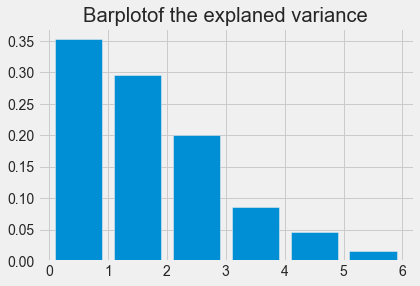

In [30]:
plt.bar(np.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Barplotof the explaned variance");

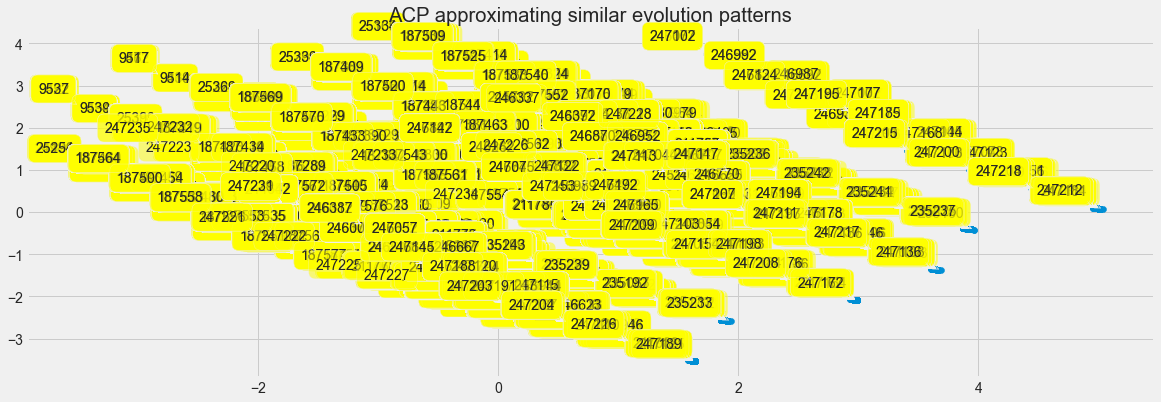

In [31]:
X_reduced = pca.transform(new)
plt.figure(figsize=(18,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

for label, x, y in zip(new.index, X_reduced[:, 0], X_reduced[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.title("ACP approximating similar evolution patterns");

In [32]:
#Hierarchical ascending classification
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(linkage='ward', compute_full_tree=True).fit(new)
dendro = [ ]
for a,b in ward.children_:
    dendro.append([a,b,float(len(dendro)+1),len(dendro)+1])

from scipy.cluster.hierarchy import dendrogram
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1,1,1)

r = dendrogram(dendro, color_threshold=1, labels=new.index, show_leaf_counts=True, ax=ax, orientation = "left")

MemoryError: Unable to allocate 228. GiB for an array with shape (30562696230,) and data type float64